<a href="https://colab.research.google.com/github/esterhsieh/MystanCodeProJects/blob/main/FLOWERS102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Define Project Folder
FOLDERNAME = 'Colab\ Notebooks/Flowers102'

%cd drive/MyDrive/$FOLDERNAME

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Flowers102


In [ ]:
# Define device
import torch
torch.manual_seed(2)
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')
print('Device:', device)

Device: cuda


In [ ]:
# Load Existing Dataset
import torchvision.datasets as dset
import torchvision.transforms as T

transform_train = T.Compose([T.Resize((224,224)), T.RandomVerticalFlip(p=0.5), 
                             T.ToTensor(),T.RandomHorizontalFlip(p=0.5),T.RandomRotation(45), 
                             T.ColorJitter(brightness=0.2, contrast=0.1, saturation=0.1, hue=0.1)])
transform_test = T.Compose([T.Resize((224,224)), T.ToTensor()])
train_data = dset.Flowers102('./train', download=True, transform=transform_train)
val_data = dset.Flowers102('./val', 'val', download=True, transform=transform_train)
test_data = dset.Flowers102('./test', 'test', download=True, transform=transform_test)

In [ ]:
from torch.utils.data import Dataset
from PIL import Image
import os
class TestFlowers(Dataset):
  def __init__(self, filenames, transform):
    self.filenames = filenames
    self.transform = transform
  def __len__(self):
    return len(self.filenames)
  def __getitem__(self, index):
    file_name = self.filenames[index]
    img_path = os.path.join('test/flowers-102/jpg/', file_name)
    img = Image.open(img_path)
    tensor_x = self.transform(img)
    return tensor_x, file_name

In [ ]:
test_file_path = []
for filename in os.listdir('test/flowers-102/jpg/'):
  if len(filename) >= 12:
    test_file_path.append(filename)

In [ ]:
test_data_name = TestFlowers(test_file_path, transform_test)
print(test_data_name[0])
print(test_data[0])

(tensor([[[0.3176, 0.3137, 0.3176,  ..., 0.7412, 0.7373, 0.7294],
         [0.3255, 0.3255, 0.3333,  ..., 0.7490, 0.7373, 0.7294],
         [0.3294, 0.3412, 0.3529,  ..., 0.7529, 0.7412, 0.7373],
         ...,
         [0.0275, 0.0706, 0.1373,  ..., 0.3961, 0.4275, 0.4863],
         [0.0235, 0.0627, 0.1333,  ..., 0.4078, 0.4784, 0.5529],
         [0.0196, 0.0549, 0.1216,  ..., 0.4353, 0.5255, 0.6157]],

        [[0.3137, 0.3098, 0.3137,  ..., 0.5961, 0.5922, 0.5843],
         [0.3216, 0.3216, 0.3294,  ..., 0.6000, 0.5882, 0.5804],
         [0.3255, 0.3373, 0.3490,  ..., 0.5882, 0.5765, 0.5725],
         ...,
         [0.0392, 0.0745, 0.1373,  ..., 0.3412, 0.3725, 0.4314],
         [0.0353, 0.0627, 0.1294,  ..., 0.3529, 0.4235, 0.5059],
         [0.0275, 0.0549, 0.1176,  ..., 0.3804, 0.4745, 0.5686]],

        [[0.2980, 0.2941, 0.2980,  ..., 0.7961, 0.7922, 0.7843],
         [0.3059, 0.3059, 0.3137,  ..., 0.8000, 0.7882, 0.7804],
         [0.3098, 0.3176, 0.3294,  ..., 0.7961, 0.7843, 0

In [ ]:
# Check Data Dimension
print(train_data)
print(val_data)
print(test_data)

Dataset Flowers102
    Number of datapoints: 1020
    Root location: ./train
    split=train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               RandomVerticalFlip(p=0.5)
               ToTensor()
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-45.0, 45.0], interpolation=nearest, expand=False, fill=0)
               ColorJitter(brightness=(0.8, 1.2), contrast=(0.9, 1.1), saturation=(0.9, 1.1), hue=(-0.1, 0.1))
           )
Dataset Flowers102
    Number of datapoints: 1020
    Root location: ./val
    split=val
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               RandomVerticalFlip(p=0.5)
               ToTensor()
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-45.0, 45.0], interpolation=nearest, expand=False, fill=0)
      

In [ ]:
num_train = len(train_data)
num_val = len(val_data)
print('Number of training:', num_train)
print('Number of validation:', num_val)

Number of training: 1020
Number of validation: 1020


In [ ]:
from torch.utils.data import DataLoader
mini_trains = DataLoader(train_data, batch_size=16, shuffle=True)
mini_vals = DataLoader(val_data, batch_size=16, shuffle=True)
mini_tests = DataLoader(test_data, batch_size=1, shuffle=False)

In [ ]:
from torchvision import models
import torch.nn as nn
import torch.optim as optim

resnet = models.resnet18(pretrained=True).cuda()
num_flatten = resnet.fc.in_features
resnet.fc = nn.Linear(num_flatten, 102)
model = resnet.to(device)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 165MB/s]


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=5e-5)

In [ ]:
# Validating Procedure
def evaluate(model, epoch, mini_vals, device, val_acc_history):
  model.eval()
  with torch.no_grad():
    total = 0
    for x, y in mini_vals:
      x = x.to(device)
      y = y.to(device)
      scores = model(x)
      predictions = scores.max(1)[1]
      acc = predictions.eq(y).sum().item()
      total += acc
    val_acc_history.append(total/num_val)
    print(f'Epoch[{epoch+1}] Acc: {total/num_val}')

In [ ]:
cost_history = []
val_acc_history = []

In [ ]:
# Training Procedure
def train(num_epoch, model, mini_trains, mini_vals, device, optimizer, cost_history):
  for epoch in range(num_epoch):
    running_loss = 0
    for count, (x, y) in enumerate(mini_trains):
      model.train()
      x = x.to(device)
      y = y.to(device)
      score = model(x)
      loss_function = nn.CrossEntropyLoss()
      loss = loss_function(score, y)
      running_loss =+ loss.item()
      if count % 20 == 0:
        print(f'Epoch[{epoch + 1}]: {loss.item()}', end='/')
        evaluate(model, epoch, mini_vals, device, val_acc_history)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    cost_history.append(running_loss/len(train_data))
    print('Cost:', running_loss/len(train_data))

In [ ]:
# Start training 
train(13, model, mini_trains, mini_vals, device, optimizer, cost_history)

Epoch[1]: 5.1038665771484375/Epoch[1] Acc: 0.011764705882352941
Epoch[1]: 4.5131025314331055/Epoch[1] Acc: 0.020588235294117647
Epoch[1]: 4.434996128082275/Epoch[1] Acc: 0.08137254901960785
Epoch[1]: 4.206221580505371/Epoch[1] Acc: 0.14019607843137255
Cost: 0.004044317264182895
Epoch[2]: 3.9759037494659424/Epoch[2] Acc: 0.1588235294117647
Epoch[2]: 3.933239221572876/Epoch[2] Acc: 0.257843137254902
Epoch[2]: 3.5233442783355713/Epoch[2] Acc: 0.3382352941176471
Epoch[2]: 3.5607552528381348/Epoch[2] Acc: 0.4176470588235294
Cost: 0.0033153066448136873
Epoch[3]: 2.926419973373413/Epoch[3] Acc: 0.44607843137254904
Epoch[3]: 3.2426860332489014/Epoch[3] Acc: 0.4892156862745098
Epoch[3]: 2.850337505340576/Epoch[3] Acc: 0.5352941176470588
Epoch[3]: 3.1709847450256348/Epoch[3] Acc: 0.5725490196078431
Cost: 0.0025780586635365207
Epoch[4]: 2.480520486831665/Epoch[4] Acc: 0.5725490196078431
Epoch[4]: 2.192173957824707/Epoch[4] Acc: 0.5980392156862745
Epoch[4]: 2.285937547683716/Epoch[4] Acc: 0.634313

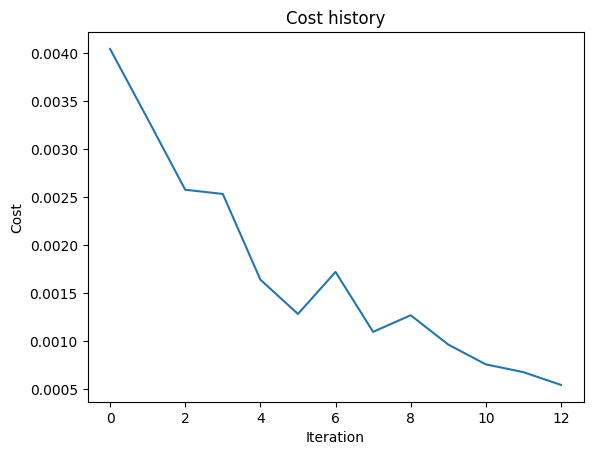

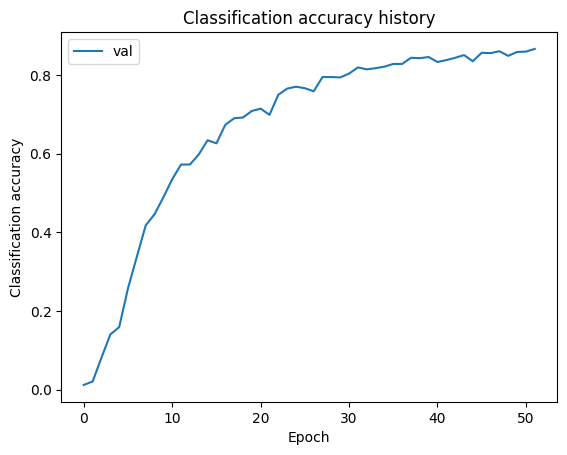

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.title('Cost history')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

plt.plot(val_acc_history, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

In [ ]:
from numpy.matrixlib import test
# Testing Procedure
import time

def predict(model, mini_tests, device):
  model.eval()
  start = time.time()
  total_acc = 0
  prediction_lst = []
  with torch.no_grad():
    for x, y in mini_tests:
      x = x.to(device)
      y = y.to(device)
      scores = model(x)
      predictions = scores.max(1)[1]
      acc = predictions.eq(y).sum().item()
      total_acc += acc
      prediction_lst.append(predictions.item())
    end = time.time()
    elapsed = end - start
    print(f'Testing acc: {total_acc/len(test_data)}, tiem_spent: {round(elapsed, 2)} sec')

  return prediction_lst

In [ ]:
predictions = predict(model, mini_tests, device)

Testing acc: 0.8388355830216295, tiem_spent: 1377.99 sec



Writing predictions to --> Flowers102_ResNet.csv


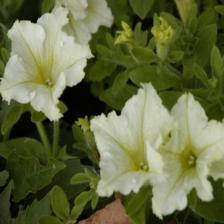

In [ ]:
def out_file(predictions, test_data_name, out_filename):

    print('\n===============================================')
    tensor2img = T.ToPILImage()
    print(f'Writing predictions to --> {out_filename}')
    with open(out_filename, 'w') as out:
        out.write('img_name,id\n')
        for (tensor_x, file_name), ans in zip(test_data_name, predictions):
          img = tensor2img(tensor_x)
          out.write(str(file_name) + ',' + str(ans) + '\n')
        img.show()
    print('===============================================')


# submission = predictions.cpu().numpy()
out_file(predictions, test_data_name, 'Flowers102_ResNet.csv')